In [24]:
import librosa.display as display

In [17]:
import librosa
import numpy as np
import os

In [327]:
sounds = [librosa.load('sounds/' + filename)[0] for filename in os.listdir('sounds') if filename.startswith('ring')]

In [285]:
sounds[0] = cut_audio(sounds[0])
features = [librosa.feature.mfcc(audio, sr=22050, n_mfcc = 20) for audio in sounds]

In [465]:
features[1]

array([[-5.5212531e+02, -5.4136633e+02, -5.2317432e+02, ...,
        -4.1474936e+02, -4.1468359e+02, -4.1891284e+02],
       [ 1.2865387e+01,  2.4757856e+01,  4.5665318e+01, ...,
         1.3508768e+02,  1.3150934e+02,  1.2572836e+02],
       [ 5.1028361e+00,  1.0398218e+01,  2.2204828e+01, ...,
         4.9153458e+01,  4.6221436e+01,  4.1315102e+01],
       ...,
       [-1.8988569e+00, -1.3851283e+00,  2.8155167e+00, ...,
         9.8972607e+00,  1.0077871e+01,  1.0260847e+01],
       [-5.8448873e+00, -5.1502242e+00, -6.7733514e-01, ...,
         5.0640869e+00,  4.0934019e+00,  8.9624918e-01],
       [-6.4057722e+00, -5.1954203e+00, -1.6749144e-02, ...,
         1.9061093e+00,  5.5019526e+00,  4.3895211e+00]], dtype=float32)

In [455]:
def correlation(x, y):
    corr = []
    a = x / np.linalg.norm(x)
    len_x = len(x)
    for i in range(len(y) - len_x):
        b = y[i : i + len_x]
        b = b / np.linalg.norm(b)
        corr.append(np.sum(a * b)) 
    return corr

In [286]:
features = [librosa.feature.mfcc(audio, sr=22050, n_mfcc = 20) for audio in sounds]

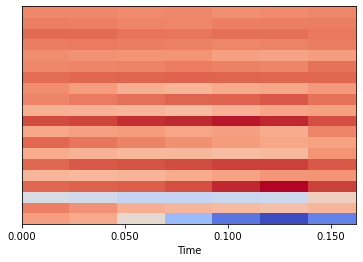

In [287]:
display.specshow(features[0], sr=22050, x_axis='time')

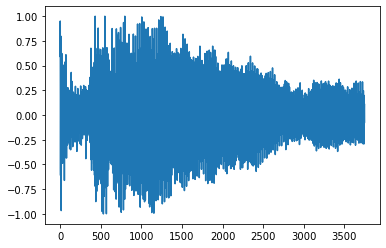

In [355]:
def cut_audio(audio):
    quant = 0.96
    high_values = np.arange(0, len(audio))[np.abs(audio) > np.quantile(np.abs(audio), quant)]
    return audio[high_values[0]:high_values[-1]]

In [356]:
features = [librosa.feature.mfcc(audio, sr=22050, n_mfcc = 20) for audio in sounds]

In [375]:
features[0].shape[0]

20

In [458]:
corr = []
# sounds[0] = sounds[0][6500:16000]
x = 0
y = 1
for i in range(features[y].shape[1] - features[x].shape[1]):
    a = features[x]
    b = features[y][:, i : i + features[x].shape[1]]
    corr.append(np.sum((a / np.linalg.norm(a)) * (b / np.linalg.norm(b)))) 

In [451]:
len(features[y])

20

In [485]:
isinstance('fssfsf', str)

True

In [528]:
from matplotlib import pyplot as plt


def correlation(x, y):
    corr = []
    a = x / np.linalg.norm(x)
    len_x = len(x)
    for i in range(len(y) - len_x):
        b = y[i : i + len_x]
        b = b / np.linalg.norm(b)
        corr.append(np.sum(a * b)) 
    return corr

def cut_audio(audio):
    quant = 0.96
    high_values = np.arange(0, len(audio))[np.abs(audio) > np.quantile(np.abs(audio), quant)]
    return audio[high_values[0]:high_values[-1]]

sounds = [librosa.load('sounds/' + filename)[0] for filename in os.listdir('sounds') if filename.startswith('ring')]
sounds[0] = cut_audio(sounds[0])
features = [librosa.feature.mfcc(audio, sr=22050, n_mfcc = 20) for audio in sounds]

x = 0
y = 4
def find_patters(pattern, stream):
corr = correlation(features[x].T, features[y].T)
# plt.figure(figsize=(10, 4))
# plt.plot(corr)
# plt.show()
plt.figure(figsize=(10, 4))
display.waveplot(sounds[y])
x_coors = np.linspace(0, sounds[y].shape[0] / sr, len(corr))
centers = get_centers((np.array(corr) > 0.8))
for cent in centers:
    plt.axvline(x_coors[cent], c='r')
    plt.axvspan(x_coors[max(0, cent - (features[0].shape[0] // 2))], x_coors[min(len(x_coors), cent + (features[0].shape[0] // 2))], alpha=0.5, color='g')

IndentationError: expected an indented block (<ipython-input-528-6bd1756ab315>, line 26)

In [487]:
rings = os.listdir('sounds')

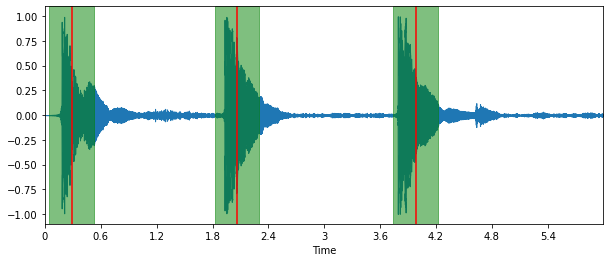

In [526]:
find_patterns('sounds/' + rings[4], 'sounds/' + rings[6])

In [492]:
rings

['clap.wav',
 'clapping.wav',
 'clapping1.wav',
 'clapping2.wav',
 'ring1.wav',
 'ring2.wav',
 'ring3.wav',
 'ring4.wav',
 'ring5.wav']

In [581]:
from matplotlib import pyplot as plt


def correlation(x, y):
    corr = []
    a = x / np.linalg.norm(x)
    len_x = len(x)
    for i in range(len(y) - len_x):
        b = y[i : i + len_x]
        b = b / np.linalg.norm(b)
        corr.append(np.sum(a * b)) 
    return corr

def cut_pattern(pattern):
    quant = 0.96
    high_values = np.arange(0, len(pattern))[np.abs(pattern) > np.quantile(np.abs(pattern), quant)]
    return pattern[high_values[0]:high_values[-1]]


def find_patterns(pattern, audio, sr=22050, n_mfcc = 20, threshold=0.8):
    if isinstance(pattern, str):
        pattern, _ = librosa.load(pattern, sr=sr)
    if isinstance(audio, str):
        audio, _ = librosa.load(audio, sr=sr)
        
    pattern = cut_pattern(pattern)
    f_pattern = librosa.feature.mfcc(pattern, sr=sr, n_mfcc=n_mfcc)
    f_audio = librosa.feature.mfcc(audio, sr=sr, n_mfcc=n_mfcc)
    
    corr = correlation(f_pattern.T, f_audio.T)
    plt.figure(figsize=(10, 4))
    display.waveplot(audio)
    x_coors = np.linspace(0, audio.shape[0] / sr, len(corr))
    centers = get_centers((np.array(corr) > threshold))
    for cent in centers:
        plt.axvline(x_coors[cent], c='r')
        plt.axvspan(x_coors[max(0, cent - (f_pattern.shape[0] // 2))], x_coors[min(len(x_coors) - 1, cent + (f_pattern.shape[0] // 2))], alpha=0.5, color='g')

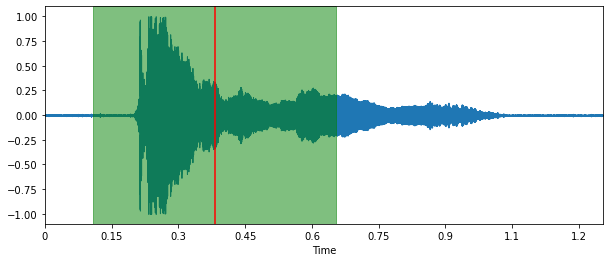

In [583]:
find_patterns('sounds/' + rings[4], 'sounds/' + rings[4])

In [421]:
def get_centers(seq):
    centers = []
#     seq = np.array(corr) > 0.8
    last_st = -1
    len_sseq = 0
    for i in range(len(seq)):
        if seq[i] == 1:
            len_sseq += 1
            if last_st == -1:
                last_st = i
        else:
            if len_sseq > 0:
                centers.append((last_st + i - 1) // 2)
            len_sseq = 0
            last_st = -1
    return centers
        

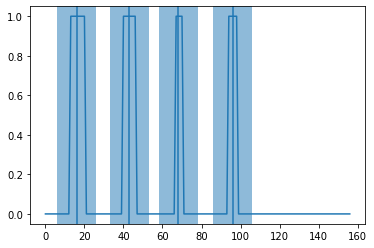

In [379]:
centers = get_centers((np.array(corr) > 0.8))
plt.plot((np.array(corr) > 0.8))
for cent in centers:
    plt.axvline(cent)
    plt.axvspan(cent - (features[0].shape[0] // 2), cent + (features[0].shape[0] // 2), alpha=0.5)

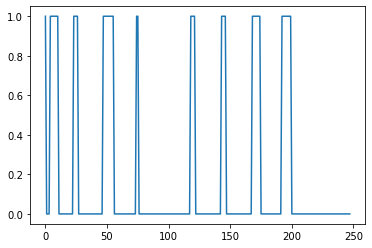

In [297]:
plt.plot(np.array(corr) > 0.8)

In [252]:
def correlation(x, y):
    corr = []
    a = x / np.linalg.norm(x)
    len_x = x.shape[0]
    for i in range(y.shape[0] - len_x):
        b = y[i : i + len_x] 
        b /= np.linalg.norm(b)
        corr.append(np.sum(a * b))
    return corr

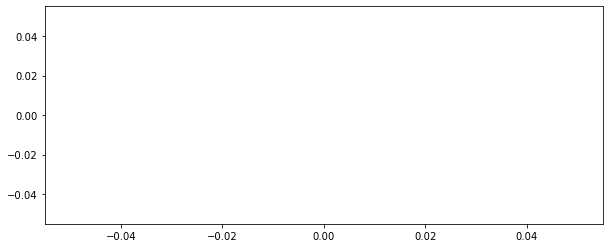

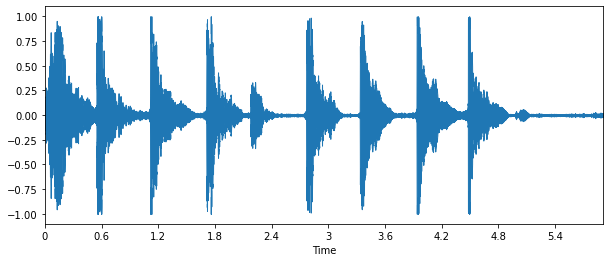

In [253]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(correlation(features[0].T, features[1].T))
plt.show()
plt.figure(figsize=(10, 4))
display.waveplot(sounds[y])

In [251]:
sounds[0][np.abs(sounds[0]) < np.median(np.abs(sounds[0]))] = 0

In [90]:
sounds[0][:-1] - sounds[0][1:]

array([ 0.        ,  0.        ,  0.        , ..., -0.00018784,
        0.00033247, -0.00153734], dtype=float32)